# Phase 1: Classical ML (regression)
Focus on data understanding and traditional models

## Step 1. Data Processing

Data source: https://insideairbnb.com/get-the-data/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load raw data
url = "https://data.insideairbnb.com/thailand/central-thailand/bangkok/2025-09-26/data/listings.csv.gz"
df_list = pd.read_csv(url, compression="gzip")
#df_list.head(2)

In [ ]:
df_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28806 entries, 0 to 28805
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            28806 non-null  int64  
 1   listing_url                                   28806 non-null  object 
 2   scrape_id                                     28806 non-null  int64  
 3   last_scraped                                  28806 non-null  object 
 4   source                                        28806 non-null  object 
 5   name                                          28806 non-null  object 
 6   description                                   28030 non-null  object 
 7   neighborhood_overview                         9484 non-null   object 
 8   picture_url                                   28806 non-null  object 
 9   host_id                                       28806 non-null 

In [ ]:
df_list.iloc[2].to_dict()

{'id': 48736,
 'listing_url': 'https://www.airbnb.com/rooms/48736',
 'scrape_id': 20250926165947,
 'last_scraped': '2025-09-27',
 'source': 'city scrape',
 'name': 'Condo with Chaopraya River View',
 'description': 'at a size of 25sqm for your vacation in BKK.<br />One bedroom, living room, kitchen and bathroom. <br />Easy access to downtown, quiet and nice residential area, swimming pool and fitness with chaopraya river view. ',
 'neighborhood_overview': nan,
 'picture_url': 'https://a0.muscache.com/pictures/12465296/e9c0f961_original.jpg',
 'host_id': 222005,
 'host_url': 'https://www.airbnb.com/users/show/222005',
 'host_name': 'Athitaya',
 'host_since': '2010-09-03',
 'host_location': 'Bangkok, Thailand',
 'host_about': 'Full-time legal consultant from Bangkok, Thailand. \n',
 'host_response_time': nan,
 'host_response_rate': nan,
 'host_acceptance_rate': '100%',
 'host_is_superhost': 'f',
 'host_thumbnail_url': 'https://a0.muscache.com/im/users/222005/profile_pic/1334747537/origin

In [3]:
# 2. CLEAN PRICE COLUMN
# drop na
df_list = df_list.dropna(subset=['price'])
df_list.info() # 23273 entries

<class 'pandas.core.frame.DataFrame'>
Index: 23273 entries, 0 to 28805
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23273 non-null  int64  
 1   listing_url                                   23273 non-null  object 
 2   scrape_id                                     23273 non-null  int64  
 3   last_scraped                                  23273 non-null  object 
 4   source                                        23273 non-null  object 
 5   name                                          23273 non-null  object 
 6   description                                   22837 non-null  object 
 7   neighborhood_overview                         7477 non-null   object 
 8   picture_url                                   23273 non-null  object 
 9   host_id                                       23273 non-null  int6

In [ ]:
# convert price to numeric

df_list['price'] = (df_list['price'].astype(str).str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float))

In [ ]:
print(df_list['price'].describe().to_string())

count      23273.000000
mean        2528.749151
std        16473.896035
min            4.000000
25%          923.000000
50%         1379.000000
75%         2207.000000
max      1000000.000000


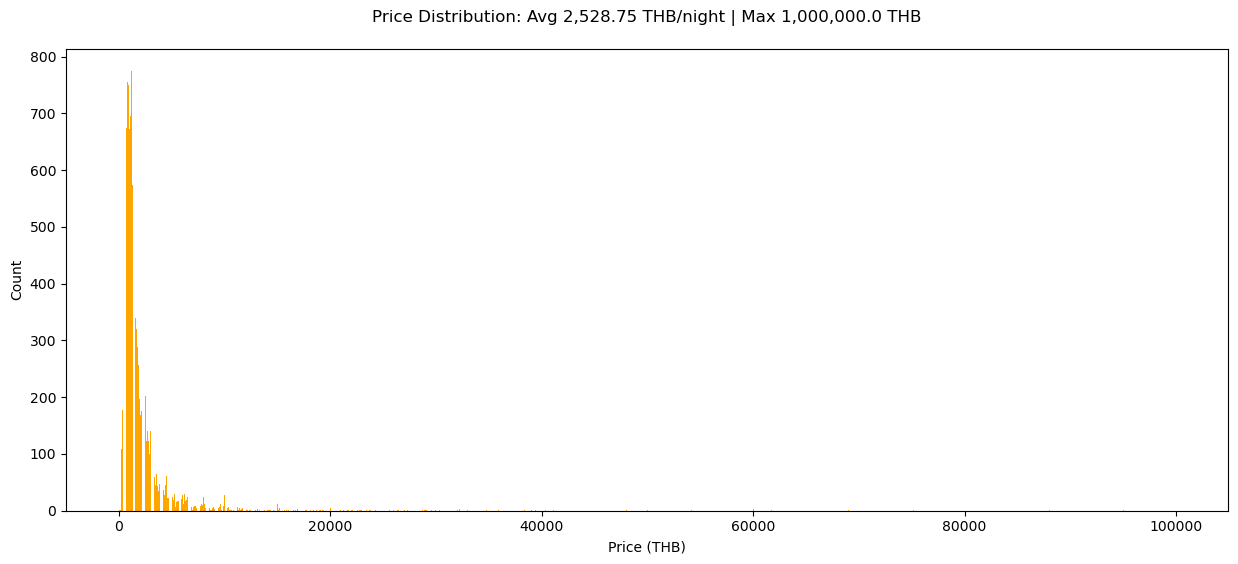

In [5]:
# Plot prices
prices = df_list['price']
prices = prices[prices > 0]
plt.figure(figsize=(15, 6))
plt.title(f"Price Distribution: Avg {prices.mean():,.2f} THB/night | Max {prices.max():,} THB\n")
plt.xlabel("Price (THB)")
plt.ylabel("Count")

plt.hist(prices, rwidth=0.7, color="orange", bins=range(0, 100000, 50))

plt.show()

In [ ]:
# Find the maximum price
max_price = df_list['price'].max()
#print("Maximum price:", max_price)

# Get the row(s) with that price
max_price_rows = df_list[df_list['price'] == max_price]
max_price_rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
979,8880974,https://www.airbnb.com/rooms/8880974,20250926165947,2025-09-27,city scrape,"Modern,wifi,5m MRT&2 Shopping Mall",Aspire Condo 37sqm 1 bedroom condominium. just...,Phra Ram 9 is a lively area conveniently locat...,https://a0.muscache.com/pictures/c71639a0-d9d4...,30803267,...,4.93,4.87,4.80,NaN,f,4,4,0,0,0.37
1442,11579635,https://www.airbnb.com/rooms/11579635,20250926165947,2025-09-27,city scrape,"2 Bedroom,wifi,5mMRT&Shopping Mall",You will feel comfortable and at home while st...,Phra ram 9 is a lively area conveniently locat...,https://a0.muscache.com/pictures/770ac184-8d94...,30803267,...,4.83,4.60,4.53,NaN,f,4,4,0,0,0.46
1946,15380964,https://www.airbnb.com/rooms/15380964,20250926165947,2025-09-27,city scrape,"Resort Style Luxury apartment,5min to MRT,free...",Our large and comfortable 2 bedroom apartment(...,Phra Ram 9 is a lively area conveniently locat...,https://a0.muscache.com/pictures/4f9a183d-ee5e...,30803267,...,4.60,4.73,4.23,NaN,f,4,4,0,0,0.38
3723,23740993,https://www.airbnb.com/rooms/23740993,20250926165947,2025-09-27,city scrape,"Modern&Luxury apartment,5min to MRT,freeWifi",Our large and comfortable 2 bedroom apartment(...,NaN,https://a0.muscache.com/pictures/06e326da-c032...,30803267,...,4.50,4.75,4.67,NaN,f,4,4,0,0,0.14


In [ ]:
max_price_rows.iloc[1].to_dict()

{'id': 11579635,
 'listing_url': 'https://www.airbnb.com/rooms/11579635',
 'scrape_id': 20250926165947,
 'last_scraped': '2025-09-27',
 'source': 'city scrape',
 'name': '2 Bedroom,wifi,5mMRT&Shopping Mall',
 'description': 'You will feel comfortable and at home while staying in BKK.Close to great areas such as Pratunam, night market and nightlife (RCA,Sukhmvit)and wellconected to all of BKK by MRT which is5m away<br />**Check out my other new apartment!!**<br />https://airbnb.com/rooms/8880974?s=8&user_id=30803267&ref_device_id=604b806b3c9f78b5a10e379c67b658fea4ece33b',
 'neighborhood_overview': 'Phra ram 9 is a lively area conveniently located in central Bangkok,just a 5m walk and you will be at the MRT and Central shopping mall and across the street is the very large IT mall.It is also just 1 station away to the famous night market and RCA and Pratunam shopping area is just 10m by cab.',
 'picture_url': 'https://a0.muscache.com/pictures/770ac184-8d94-4998-a0d9-89475e24046e.jpg',
 'h

In [13]:
# Filter extreme prices
# remove prices <=0 and extreme outliers 
print(f"mean: {df_list['price'].mean()}")
print(f"median: {df_list['price'].median()}")
print(f"max: {df_list['price'].max()}")
print(f"min: {df_list['price'].min()}")

mean: 2528.7491513771324
median: 1379.0
max: 1000000.0
min: 4.0


In [14]:
# keep price between 100 and 20,000 THB (reasonable range for nightly rentals)

df_list = df_list[(df_list['price'] > 0) & 
                  (df_list['price'] >= 100) & 
                  (df_list['price'] <= 20000)].copy()

In [15]:
print(f"mean: {df_list['price'].mean()}")
print(f"median: {df_list['price'].median()}")
print(f"max: {df_list['price'].max()}")
print(f"min: {df_list['price'].min()}")

mean: 1976.5164992205093
median: 1372.0
max: 20000.0
min: 122.0


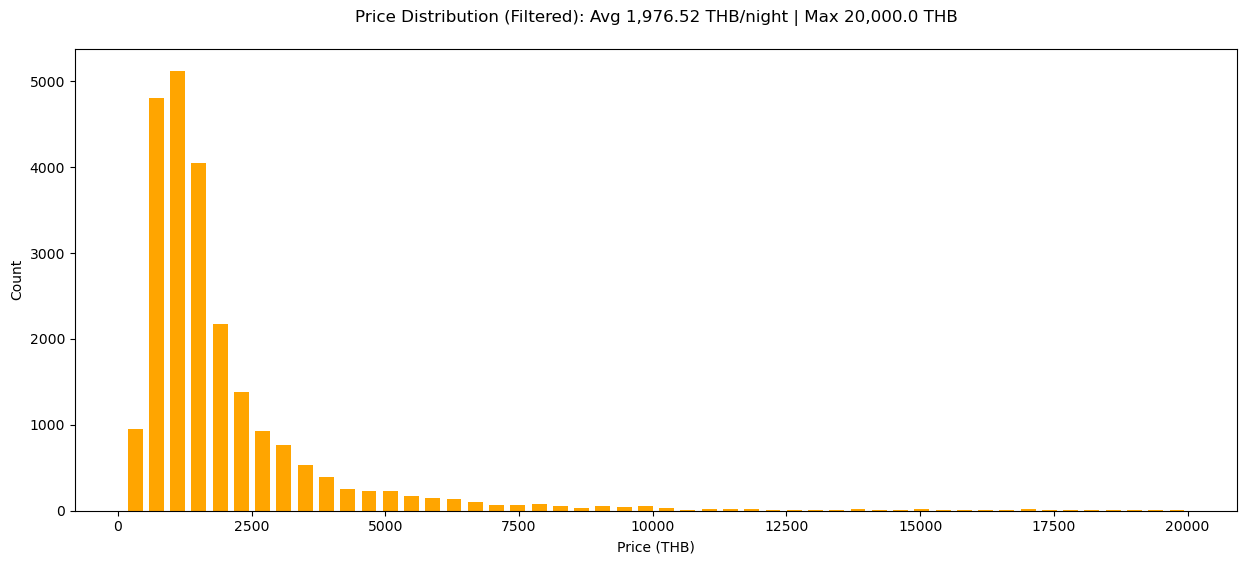

In [16]:
# Plot prices AFTER filtering
prices = df_list['price']
prices = prices[prices > 0]

plt.figure(figsize=(15, 6))
plt.title(f"Price Distribution (Filtered): Avg {prices.mean():,.2f} THB/night | Max {prices.max():,} THB\n")
plt.xlabel("Price (THB)")
plt.ylabel("Count")

plt.hist(prices, rwidth=0.7, color="orange", bins=50)

plt.show()

In [17]:
# load review data
url = "https://data.insideairbnb.com/thailand/central-thailand/bangkok/2025-09-26/data/reviews.csv.gz"
df_review = pd.read_csv(url, compression="gzip")
# df_review.head()

In [ ]:
df_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,27934,1094339,2012-04-07,1368195,Michael,We stayed in the apartment for a week and we e...
1,27934,1241042,2012-05-07,2007324,Scott,My girlfriend and I recently stayed in Nuttee'...
2,27934,1523384,2012-06-20,2263352,Marc,I stayed for one month at the condo and was re...
3,27934,1655571,2012-07-08,558987,Leyla,Nuttee was a great host! I really enjoyed her ...
4,27934,1972192,2012-08-13,2359865,Rachel,Nuttee was an amazing host. She and her daught...


In [18]:
# long to wide convert
# 3. AGGREGATE REVIEWS → ONE TEXT PER LISTING
grouped = df_review.groupby('listing_id')['comments'].apply(lambda texts: " ".join(texts.dropna().astype(str))).reset_index()
grouped.rename(columns={'comments':'all_review_texts'}, inplace=True)

# Merge listings + aggregated reviews
df = df_list.merge(grouped, how='left', left_on='id', right_on='listing_id')

In [ ]:
df.iloc[10].to_dict()

{'id': 1035589,
 'listing_url': 'https://www.airbnb.com/rooms/1035589',
 'scrape_id': 20250926165947,
 'last_scraped': '2025-09-26',
 'source': 'city scrape',
 'name': 'Double  Bed Apartment',
 'description': 'Nestled in the quiet area around the suburbs of Bangkok. Salaya is an old district dating back many hundred years. Our place is ideal for retired couples who is looking for a quiet retreat.<br /><br />Recently we have a learning center on property, So during weekdays from 7.00am-17.00pm  there will be noises from kids.',
 'neighborhood_overview': 'There’s a 7-11 near by about 3minutes walk.',
 'picture_url': 'https://a0.muscache.com/pictures/15567432/8b44e066_original.jpg',
 'host_id': 4115838,
 'host_url': 'https://www.airbnb.com/users/show/4115838',
 'host_name': 'Primrose',
 'host_since': '2012-11-11',
 'host_location': 'Boston, MA',
 'host_about': "Hi there!\r\nI love to travel,meet new people and learn new cultures.Prague is one of my favorite cities and I hope to go back ag

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23273 entries, 0 to 23272
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23273 non-null  int64  
 1   listing_url                                   23273 non-null  object 
 2   scrape_id                                     23273 non-null  int64  
 3   last_scraped                                  23273 non-null  object 
 4   source                                        23273 non-null  object 
 5   name                                          23273 non-null  object 
 6   description                                   22837 non-null  object 
 7   neighborhood_overview                         7477 non-null   object 
 8   picture_url                                   23273 non-null  object 
 9   host_id                                       23273 non-null 

In [19]:
#-----------------------------------------------------------------------------------------------
# TEXT CLEANING
import re

def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text)

    # Remove <br>, <br/>, <BR>, <br /> etc.
    text = re.sub(r'<\s*br\s*/?\s*>', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'<[^>]+>', '', text)  # Remove other HTML tags

    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)

    # Remove emojis and non-ASCII characters
    text = text.encode('ascii', 'ignore').decode()

    # Clean special characters but keep basic punctuation
    text = re.sub(r'[:\[\]"{}""'']+', ' ', text)

    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Clean up comma issues
    text = text.replace(" ,", ",").replace(",,,", ",").replace(",,", ",")

    return text

In [20]:
# Clean text fields
for col in ["name", "description", "neighborhood_overview","property_type","room_type", "host_about", "bathrooms_text","host_location","all_review_texts"]:
    df[col] = df[col].astype(str).apply(clean_text)

In [ ]:
df.iloc[1].to_dict()

{'id': 47516,
 'listing_url': 'https://www.airbnb.com/rooms/47516',
 'scrape_id': 20250926165947,
 'last_scraped': '2025-09-27',
 'source': 'city scrape',
 'name': 'Beautiful waterfront house',
 'description': 'nan',
 'neighborhood_overview': 'nan',
 'picture_url': 'https://a0.muscache.com/pictures/271998/b090ade8_original.jpg',
 'host_id': 214456,
 'host_url': 'https://www.airbnb.com/users/show/214456',
 'host_name': 'Anuradha',
 'host_since': '2010-08-27',
 'host_location': 'New Delhi, India',
 'host_about': 'nan',
 'host_response_time': nan,
 'host_response_rate': nan,
 'host_acceptance_rate': nan,
 'host_is_superhost': 'f',
 'host_thumbnail_url': 'https://a0.muscache.com/defaults/user_pic-50x50.png?v=3',
 'host_picture_url': 'https://a0.muscache.com/defaults/user_pic-225x225.png?v=3',
 'host_neighbourhood': nan,
 'host_listings_count': 1.0,
 'host_total_listings_count': 2.0,
 'host_verifications': "['email', 'phone']",
 'host_has_profile_pic': 'f',
 'host_identity_verified': 't',
 

In [21]:
# process amenitis
from ast import literal_eval

def parse_amenities(a):
    try:
        lst = literal_eval(a)
        return ", ".join(lst)
    except:
        return ""

df["amenities_clean"] = df["amenities"].apply(parse_amenities)

In [ ]:
df.iloc[10].to_dict()

{'id': 1035589,
 'listing_url': 'https://www.airbnb.com/rooms/1035589',
 'scrape_id': 20250926165947,
 'last_scraped': '2025-09-26',
 'source': 'city scrape',
 'name': 'Double Bed Apartment',
 'description': 'Nestled in the quiet area around the suburbs of Bangkok. Salaya is an old district dating back many hundred years. Our place is ideal for retired couples who is looking for a quiet retreat. Recently we have a learning center on property, So during weekdays from 7.00am-17.00pm there will be noises from kids.',
 'neighborhood_overview': 'Theres a 7-11 near by about 3minutes walk.',
 'picture_url': 'https://a0.muscache.com/pictures/15567432/8b44e066_original.jpg',
 'host_id': 4115838,
 'host_url': 'https://www.airbnb.com/users/show/4115838',
 'host_name': 'Primrose',
 'host_since': '2012-11-11',
 'host_location': 'Boston, MA',
 'host_about': "Hi there! I love to travel,meet new people and learn new cultures.Prague is one of my favorite cities and I hope to go back again someday. I lo

## Step 2: Feature Engineering

In [ ]:
# Derived features from reviews and host
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23273 entries, 0 to 23272
Data columns (total 82 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23273 non-null  int64  
 1   listing_url                                   23273 non-null  object 
 2   scrape_id                                     23273 non-null  int64  
 3   last_scraped                                  23273 non-null  object 
 4   source                                        23273 non-null  object 
 5   name                                          23273 non-null  object 
 6   description                                   23273 non-null  object 
 7   neighborhood_overview                         23273 non-null  object 
 8   picture_url                                   23273 non-null  object 
 9   host_id                                       23273 non-null 

In [22]:
# review text length (proxy for reviewer activity/content)
df['all_reviews_len'] = df['all_review_texts'].fillna("").apply(len)

In [23]:
df['num_amenities'] = df['amenities'].fillna("[]").apply(lambda x: len(eval(x)) if isinstance(x, str) and x.strip().startswith('[') else 0)

In [24]:
from datetime import datetime

def parse_date_safe(s):
    try:
        return datetime.strptime(s, "%Y-%m-%d")
    except:
        return np.nan

df['host_since_dt'] = df['host_since'].apply(parse_date_safe)
now = pd.to_datetime(df['last_scraped'], errors='coerce').fillna(pd.to_datetime("2025-09-27"))
df['host_tenure_years'] = (now - df['host_since_dt']).dt.days / 365

In [25]:
# simple binary conversions
df['host_is_superhost_bin'] = df['host_is_superhost'].map({'t':1,'f':0})
df['instant_bookable_bin'] = df['instant_bookable'].map({'t':1,'f':0})

In [26]:
# fill missing numeric counts with 0 where logical
df['number_of_reviews'] = df['number_of_reviews'].fillna(0)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
# 3b) Handle obvious missingness for numeric columns
# We'll let the pipeline impute medians, but check distributions
print(df[['bedrooms','beds','bathrooms']].describe())

           bedrooms          beds     bathrooms
count  23185.000000  23220.000000  23213.000000
mean       1.394695      1.821102      1.398570
std        1.161426      1.835273      1.045584
min        0.000000      0.000000      0.000000
25%        1.000000      1.000000      1.000000
50%        1.000000      1.000000      1.000000
75%        1.000000      2.000000      1.500000
max       50.000000     50.000000     50.000000


In [27]:
# Keep a sane set of candidate features
candidate_features = [
    'room_type', 'property_type', 'neighbourhood_cleansed',
    'accommodates', 'bedrooms', 'beds', 'bathrooms',
    'num_amenities', 'all_reviews_len', 'number_of_reviews', 'reviews_per_month',
    'review_scores_rating', 'host_tenure_years', 'host_is_superhost_bin', 'instant_bookable_bin',
    'latitude', 'longitude', 'minimum_nights'
]

# Quick check
df[candidate_features + ['price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23092 entries, 0 to 23091
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   room_type               23092 non-null  object 
 1   property_type           23092 non-null  object 
 2   neighbourhood_cleansed  23092 non-null  object 
 3   accommodates            23092 non-null  int64  
 4   bedrooms                23005 non-null  float64
 5   beds                    23039 non-null  float64
 6   bathrooms               23032 non-null  float64
 7   num_amenities           23092 non-null  int64  
 8   all_reviews_len         23092 non-null  int64  
 9   number_of_reviews       23092 non-null  int64  
 10  reviews_per_month       23092 non-null  float64
 11  review_scores_rating    16043 non-null  float64
 12  host_tenure_years       23085 non-null  float64
 13  host_is_superhost_bin   21633 non-null  float64
 14  instant_bookable_bin    23092 non-null

In [28]:
# 4) Prepare target: log-transform price because of strong right skew
df = df[df['price'] > 0].copy()  # ensure positive
df['log_price'] = np.log1p(df['price'])   # target for regression

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score

# For reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Split into train/test
feature_df = df[candidate_features].copy()
target = df['log_price'].copy()

X_train, X_test, y_train, y_test = train_test_split(feature_df, target, test_size=0.20, random_state=RANDOM_STATE)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (18473, 18) Test size: (4619, 18)


In [ ]:
df.iloc[10].to_dict()

{'id': 1035589,
 'listing_url': 'https://www.airbnb.com/rooms/1035589',
 'scrape_id': 20250926165947,
 'last_scraped': '2025-09-26',
 'source': 'city scrape',
 'name': 'Double Bed Apartment',
 'description': 'Nestled in the quiet area around the suburbs of Bangkok. Salaya is an old district dating back many hundred years. Our place is ideal for retired couples who is looking for a quiet retreat. Recently we have a learning center on property, So during weekdays from 7.00am-17.00pm there will be noises from kids.',
 'neighborhood_overview': 'Theres a 7-11 near by about 3minutes walk.',
 'picture_url': 'https://a0.muscache.com/pictures/15567432/8b44e066_original.jpg',
 'host_id': 4115838,
 'host_url': 'https://www.airbnb.com/users/show/4115838',
 'host_name': 'Primrose',
 'host_since': '2012-11-11',
 'host_location': 'Boston, MA',
 'host_about': "Hi there! I love to travel,meet new people and learn new cultures.Prague is one of my favorite cities and I hope to go back again someday. I lo

In [30]:
# 5) Build preprocessing pipelines
numeric_features = [
    'accommodates','bedrooms','beds','bathrooms',
    'num_amenities','all_reviews_len','number_of_reviews','reviews_per_month',
    'review_scores_rating','host_tenure_years','latitude','longitude','minimum_nights'
]
# categorical features we'll one-hot
categorical_features = ['room_type','property_type','neighbourhood_cleansed']

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# numeric transformer: impute median, then scale
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# categorical transformer: impute 'missing' then OneHot
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [32]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='drop')

# full pipeline: preprocess -> linear regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('reg', LinearRegression())
])

In [33]:
# 6) Fit model
pipeline.fit(X_train, y_train)

# Predictions in log-space
y_pred_log = pipeline.predict(X_test)


In [34]:
# Convert back to original price
y_pred = np.expm1(y_pred_log)  # inverse of log1p
y_true = np.expm1(y_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²: {r2:.4f}")

MAE: 773.84
RMSE: 1,604.67
R²: 0.3321


Define Color Coding for Errors:
- Very Good → Green
- Good → Yellow
- So-so / Bad → Red

In [36]:
# Color map for terminal printing
COLOR_MAP = {
    "green": "\033[92m",    # good
    "orange": "\033[93m",   # okay
    "red": "\033[91m"       # bad
}
RESET = "\033[0m"

def color_for_error(pred, truth):
    error_ratio = abs(pred - truth) / (truth + 1e-6)

    if error_ratio < 0.10:
        return "green"   # <10% error → very good
    elif error_ratio < 0.30:
        return "orange"  # <30% error → acceptable
    else:
        return "red"     # >30% error → bad

In [37]:
import math

records = []

print("\n======== PREDICTION REPORT ========\n")

for i, (pred, truth) in enumerate(zip(y_pred, y_true)):
    error = abs(pred - truth)
    sle = (math.log1p(truth) - math.log1p(pred)) ** 2
    color = color_for_error(pred, truth)

    records.append({
        "index": i,
        "truth": truth,
        "pred": pred,
        "error": error,
        "sle": sle,
        "ape": error / truth if truth != 0 else np.nan,   # absolute percentage error
        "hit": 1 if truth != 0 and (error / truth) <= 0.2 else 0,
        "color": color
    })

    print(
        f"{COLOR_MAP[color]}"
        f"{i+1:03d}: "
        f"Pred: {pred:,.0f} THB | "
        f"Truth: {truth:,.0f} THB | "
        f"Error: {error:,.0f} | "
        f"SLE: {sle:.4f}"
        f"{RESET}"
    )


======== PREDICTION REPORT ========

001: Pred: 1,947 THB | Truth: 1,164 THB | Error: 783 | SLE: 0.2641
002: Pred: 1,200 THB | Truth: 1,638 THB | Error: 438 | SLE: 0.0967
003: Pred: 897 THB | Truth: 690 THB | Error: 207 | SLE: 0.0688
004: Pred: 2,809 THB | Truth: 6,650 THB | Error: 3,841 | SLE: 0.7424
005: Pred: 1,333 THB | Truth: 1,000 THB | Error: 333 | SLE: 0.0825
006: Pred: 2,366 THB | Truth: 771 THB | Error: 1,595 | SLE: 1.2549
007: Pred: 1,459 THB | Truth: 1,037 THB | Error: 422 | SLE: 0.1163
008: Pred: 1,284 THB | Truth: 475 THB | Error: 809 | SLE: 0.9855
009: Pred: 2,685 THB | Truth: 2,245 THB | Error: 440 | SLE: 0.0320
010: Pred: 1,210 THB | Truth: 2,400 THB | Error: 1,190 | SLE: 0.4689
011: Pred: 1,243 THB | Truth: 1,072 THB | Error: 171 | SLE: 0.0219
012: Pred: 1,825 THB | Truth: 2,350 THB | Error: 525 | SLE: 0.0640
013: Pred: 1,388 THB | Truth: 1,900 THB | Error: 512 | SLE: 0.0986
014: Pred: 309 THB | Truth: 1,017 THB | Error: 708 | SLE: 1.4153
015: Pred: 1,789 THB | Truth

In [38]:
eval_df = pd.DataFrame(records)

In [39]:
# ===== METRICS =====
mae = eval_df["error"].mean()
mape = eval_df["ape"].mean() * 100
rmsle = np.sqrt(eval_df["sle"].mean())
hit_rate = eval_df["hit"].mean() * 100

print("\n======== METRICS ========")
print(f"MAE:   {mae:,.2f} THB")
print(f"MAPE:  {mape:.2f}%")
print(f"RMSLE: {rmsle:.4f}")
print(f"Hit-rate (<=20% error): {hit_rate:.2f}%")
print("==========================\n")


======== METRICS ========
MAE:   773.84 THB
MAPE:  41.75%
RMSLE: 0.4989
Hit-rate (<=20% error): 36.76%



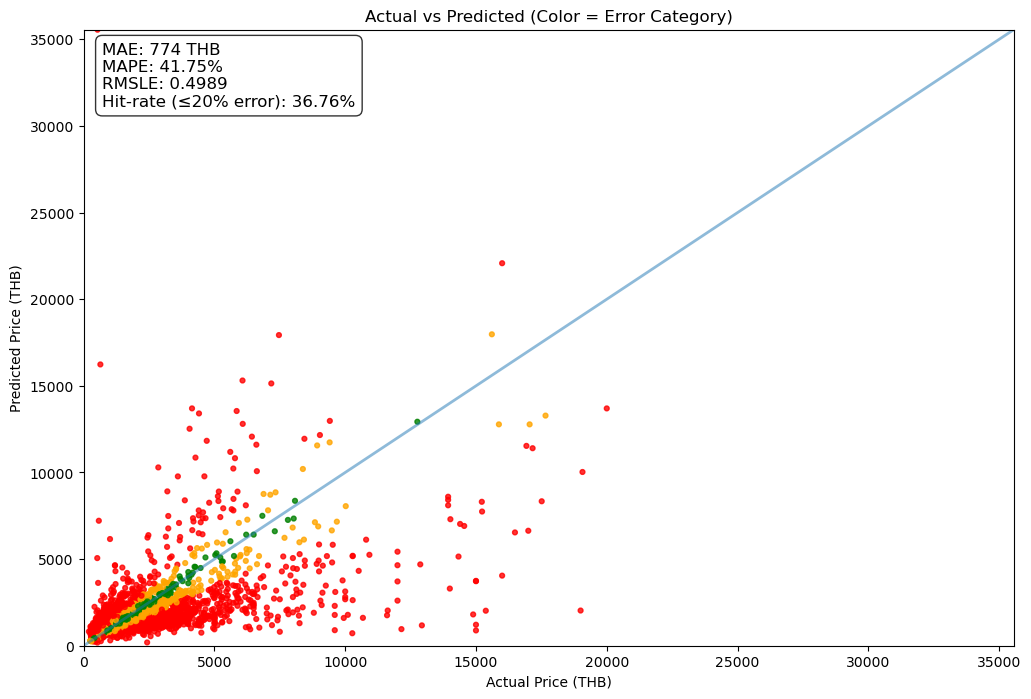

In [42]:
plt.figure(figsize=(12, 8))

max_val = max(max(y_pred), max(y_true))
plt.plot([0, max_val], [0, max_val], lw=2, alpha=0.5)

plt.scatter(
    eval_df["truth"],
    eval_df["pred"],
    c=eval_df["color"].map({
        "green": "green",
        "orange": "orange",
        "red": "red"
    }),
    s=12,
    alpha=0.8
)

plt.xlabel("Actual Price (THB)")
plt.ylabel("Predicted Price (THB)")
plt.title("Actual vs Predicted (Color = Error Category)")
plt.xlim(0, max_val)
plt.ylim(0, max_val)

# ===== ADD METRICS AS TEXT BOX =====
metrics_text = (
    f"MAE: {mae:,.0f} THB\n"
    f"MAPE: {mape:.2f}%\n"
    f"RMSLE: {rmsle:.4f}\n"
    f"Hit-rate (≤20% error): {hit_rate:.2f}%"
)

plt.text(
    0.02, 0.98,
    metrics_text,
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", alpha=0.8)
)

plt.show()

In [ ]:
# Extract linear regression from pipeline
linreg = pipeline.named_steps["reg"]

# Extract feature names after transformation
feature_names = (
    pipeline.named_steps["preprocessor"]
    .get_feature_names_out()
)

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": linreg.coef_
}).sort_values(by="coefficient", key=abs, ascending=False)

coef_df.head(20)


,feature,coefficient
86,cat__property_type_Tent,-1.517211
48,cat__property_type_Private room in farm stay,1.282916
59,cat__property_type_Private room in ryokan,-1.247693
65,cat__property_type_Private room in treehouse,1.127988
117,cat__neighbourhood_cleansed_Nong Khaem,-1.076751
45,cat__property_type_Private room in cottage,1.062880
91,cat__neighbourhood_cleansed_Bang Khae,-1.011618
58,cat__property_type_Private room in resort,0.990213
116,cat__neighbourhood_cleansed_Nong Chok,0.983177
113,cat__neighbourhood_cleansed_Lat Krabang,0.925698


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23273 entries, 0 to 23272
Data columns (total 89 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            23273 non-null  int64         
 1   listing_url                                   23273 non-null  object        
 2   scrape_id                                     23273 non-null  int64         
 3   last_scraped                                  23273 non-null  object        
 4   source                                        23273 non-null  object        
 5   name                                          23273 non-null  object        
 6   description                                   23273 non-null  object        
 7   neighborhood_overview                         23273 non-null  object        
 8   picture_url                                   23273 non-null  obje